In [ ]:
# from google.colab import drive
# drive.mount('gdrive')
# %cd /content/gdrive/'My Drive'/Dataset/Assignment6

In [ ]:
###IMPORTS
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools
from keras.callbacks import ModelCheckpoint

In [ ]:
# #cifar-10-batches-py
# def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

In [ ]:
# data = []
# labels = []
# filename = []

# for i in range(6):
#   datafilename = "cifar-10-batches-py/data_batch_"+ str(i+1)
#   file1 = unpickle(datafilename)
#   d = file1[b'data']
#   l = file1[b'labels']
#   f = file1[b'filenames']

#   for x in d:
#     data.append(x)
#   for x in l:
#     labels.append(x)
#   for x in f:
#     filename.append(x)

# print(len(data), len(labels))

In [ ]:
# data = np.array(data)
# labels = np.array(labels)
# print(data.shape, labels.shape)

In [ ]:
# print(np.unique(labels))

In [ ]:
# xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.3)

## Global Variables

In [ ]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100
data_augmentation = False

In [ ]:
# print(xtrain)

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
X = []
Y = []
for i in x_train:
  X.append(i)
for i in x_test:
  X.append(i)
for i in y_train:
  Y.append(i)
for i in y_test:
  Y.append(i)

train = np.array(X)
test = np.array(Y)

xtrain, xtest, ytrain, ytest = train_test_split(train, test, test_size=0.3)
print('xtrain shape:', xtrain.shape)
print('ytrain shape:', ytrain.shape)
print(xtrain.shape[0], 'train samples')
print(xtest.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples
xtrain shape: (42000, 32, 32, 3)
ytrain shape: (42000, 1)
42000 train samples
18000 test samples


In [ ]:
# fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# # Count plot for training set
# sns.countplot(ytrain.ravel(), ax=axs[0])
# axs[0].set_title('Distribution of training data')
# axs[0].set_xlabel('Classes')
# # Count plot for testing set
# sns.countplot(ytest.ravel(), ax=axs[1])
# axs[1].set_title('Distribution of Testing data')
# axs[1].set_xlabel('Classes')
# plt.show()

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

In [ ]:
# Normalize the data. Before we need to connvert data type to float for computation.
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
ytrain = keras.utils.to_categorical(ytrain, num_classes)
ytest = keras.utils.to_categorical(ytest, num_classes)

In [ ]:
print(ytrain)

[[0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
# #define the convnet
# model = Sequential()
# # CONV => RELU => CONV => RELU => POOL => DROPOUT
# model.add(Conv2D(32, (3, 3), padding='same',input_shape=xtrain.shape[1:]))
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # CONV => RELU => CONV => RELU => POOL => DROPOUT
# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # FLATTERN => DENSE => RELU => DROPOUT
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# # a softmax classifier
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

# model.summary()

## 1. No batch normalization

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
#model.add(Conv2D(32, (3, 3), padding='valid',input_shape=xtrain.shape[1:]))
model.add(ZeroPadding2D(padding=(1, 1), data_format=None))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# a softmax classifier
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#model.summary()

In [ ]:
# initiate RMSprop optimizer
# opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False, name="SGD")

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history = None  # For recording the history of trainning process.
history = model.fit(xtrain, ytrain,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(xtest, ytest),
      shuffle=True)
model.summary()

Epoch 1/100
1313/1313 [==============================] - 5s 3ms/step - loss: 2.2127 - accuracy: 0.1803 - val_loss: 2.0863 - val_accuracy: 0.2796
Epoch 2/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.0511 - accuracy: 0.2650 - val_loss: 1.9839 - val_accuracy: 0.3182
Epoch 3/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.9704 - accuracy: 0.2989 - val_loss: 1.9285 - val_accuracy: 0.3380
Epoch 4/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.9235 - accuracy: 0.3218 - val_loss: 1.8928 - val_accuracy: 0.3559
Epoch 5/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.8873 - accuracy: 0.3391 - val_loss: 1.8626 - val_accuracy: 0.3611
Epoch 6/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.8579 - accuracy: 0.3502 - val_loss: 1.8339 - val_accuracy: 0.3780
Epoch 7/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.8292 - accuracy: 0.3592 - val_loss: 1.8093 - val_ac

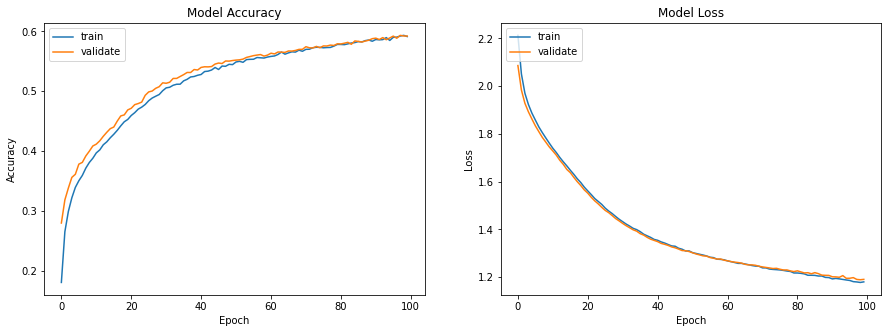

In [ ]:
plotmodelhistory(history)

In [ ]:
plot_test_loss = []
plot_test_acc = []

In [ ]:
# Score trained model.
scores = model.evaluate(xtest, ytest, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

563/563 [==============================] - 1s 2ms/step - loss: 1.1912 - accuracy: 0.5921
Test loss: 1.1911931037902832
Test accuracy: 0.5921111106872559


In [ ]:
# plot_test_loss = []
# plot_test_acc = []
# for i in range(4):
#   scores = model.evaluate(xtest, ytest, verbose=1)
plot_test_loss.append(scores[0])
plot_test_acc.append(scores[1]*100)

## 2. 2 Dense Layers

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(ZeroPadding2D(padding=(1, 1), data_format=None))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# a softmax classifier
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# model.summary()

In [ ]:
# initiate RMSprop optimizer
# opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False, name="SGD")

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = None  # For recording the history of trainning process.
history = model.fit(xtrain, ytrain,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(xtest, ytest),
      shuffle=True)

model.summary()

Epoch 1/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.2432 - accuracy: 0.2367 - val_loss: 1.7893 - val_accuracy: 0.3979
Epoch 2/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.8617 - accuracy: 0.3329 - val_loss: 1.6504 - val_accuracy: 0.4370
Epoch 3/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.7492 - accuracy: 0.3691 - val_loss: 1.5978 - val_accuracy: 0.4306
Epoch 4/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.6569 - accuracy: 0.4025 - val_loss: 1.5069 - val_accuracy: 0.4806
Epoch 5/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.5960 - accuracy: 0.4220 - val_loss: 1.4424 - val_accuracy: 0.5019
Epoch 6/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.5450 - accuracy: 0.4442 - val_loss: 1.4512 - val_accuracy: 0.4836
Epoch 7/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.5107 - accuracy: 0.4553 - val_loss: 1.3614 - val_ac

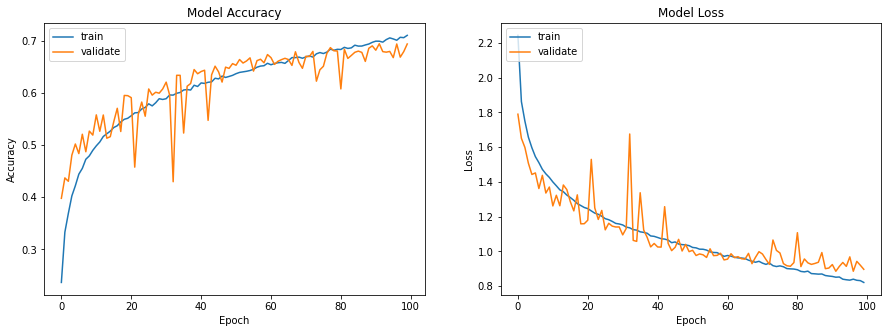

In [ ]:
plotmodelhistory(history)

In [ ]:
# model.save('best model')

In [ ]:
# Score trained model.
scores = model.evaluate(xtest, ytest, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

563/563 [==============================] - 1s 2ms/step - loss: 0.8963 - accuracy: 0.6936
Test loss: 0.8963325619697571
Test accuracy: 0.6936110854148865


In [ ]:
checkpoint = ModelCheckpoint('bestmodel.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

model.compile(optimizer='SGD', loss='mean_squared_error', metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=1, validation_split=0.3, callbacks=[checkpoint], verbose = False)


Epoch 00001: val_loss improved from inf to 0.02812, saving model to bestmodel.h5


In [ ]:
# plot_test_loss = []
# plot_test_acc = []
# for i in range(4):
#   scores = model.evaluate(xtest, ytest, verbose=1)
plot_test_loss.append(scores[0])
plot_test_acc.append(scores[1]*100)

## 3. 2 Block Conv2D, BatchNorm, Maxpool

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(ZeroPadding2D(padding=(1, 1), data_format=None))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#model.summary()

In [ ]:
# initiate RMSprop optimizer
# opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False, name="SGD")

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = None  # For recording the history of trainning process.
history = model.fit(xtrain, ytrain,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(xtest, ytest),
      shuffle=True)
model.summary()

Epoch 1/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.7302 - accuracy: 0.4048 - val_loss: 1.4736 - val_accuracy: 0.4760
Epoch 2/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.3622 - accuracy: 0.5172 - val_loss: 1.3827 - val_accuracy: 0.5174
Epoch 3/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.2424 - accuracy: 0.5624 - val_loss: 1.3670 - val_accuracy: 0.5232
Epoch 4/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.1678 - accuracy: 0.5899 - val_loss: 1.2651 - val_accuracy: 0.5613
Epoch 5/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.1060 - accuracy: 0.6120 - val_loss: 1.1505 - val_accuracy: 0.6023
Epoch 6/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.0547 - accuracy: 0.6339 - val_loss: 1.2033 - val_accuracy: 0.5914
Epoch 7/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.0175 - accuracy: 0.6446 - val_loss: 1.2110 - val_ac

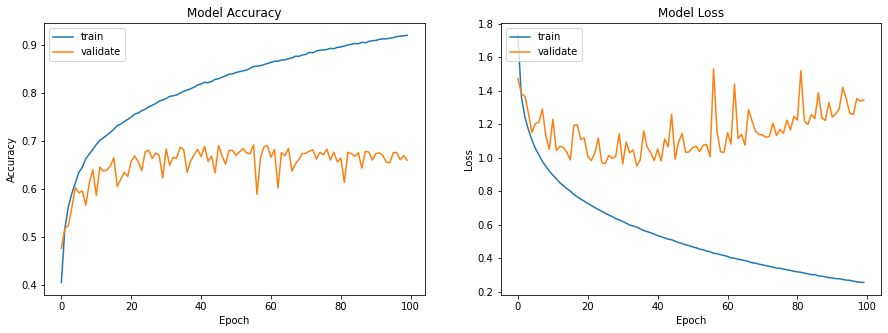

In [ ]:
plotmodelhistory(history)

In [ ]:
# Score trained model.
scores = model.evaluate(xtest, ytest, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

563/563 [==============================] - 1s 2ms/step - loss: 1.3454 - accuracy: 0.6594
Test loss: 1.345404028892517
Test accuracy: 0.6593888998031616


In [ ]:
# plot_test_loss = []
# plot_test_acc = []
# for i in range(4):
#   scores = model.evaluate(xtest, ytest, verbose=1)
plot_test_loss.append(scores[0])
plot_test_acc.append(scores[1]*100)

## 4. 3 Blocks ...

In [ ]:
#define the convnet
model = Sequential()
# zeropadding => RELU => CONV => RELU => POOL => DROPOUT
model.add(ZeroPadding2D(padding=(1, 1), data_format=None))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.25))
model.add(Flatten())
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#model.summary()

In [ ]:
# initiate RMSprop optimizer
# opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False, name="SGD")

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = None  # For recording the history of trainning process.
history = model.fit(xtrain, ytrain,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(xtest, ytest),
      shuffle=True)
model.summary()

Epoch 1/100
1313/1313 [==============================] - 6s 4ms/step - loss: 1.8439 - accuracy: 0.3574 - val_loss: 1.6127 - val_accuracy: 0.4232
Epoch 2/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.4999 - accuracy: 0.4643 - val_loss: 1.4631 - val_accuracy: 0.4791
Epoch 3/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.3756 - accuracy: 0.5121 - val_loss: 1.3958 - val_accuracy: 0.5063
Epoch 4/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.2911 - accuracy: 0.5430 - val_loss: 1.3357 - val_accuracy: 0.5314
Epoch 5/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.2286 - accuracy: 0.5662 - val_loss: 1.3963 - val_accuracy: 0.5083
Epoch 6/100
1313/1313 [==============================] - 6s 4ms/step - loss: 1.1769 - accuracy: 0.5863 - val_loss: 1.5946 - val_accuracy: 0.4726
Epoch 7/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.1356 - accuracy: 0.6016 - val_loss: 1.2013 - val_ac

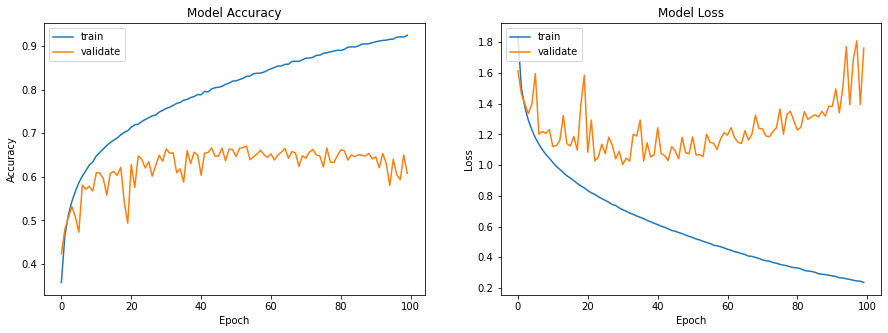

In [ ]:
plotmodelhistory(history)

In [ ]:
# Score trained model.
scores = model.evaluate(xtest, ytest, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

563/563 [==============================] - 1s 2ms/step - loss: 1.7606 - accuracy: 0.6079
Test loss: 1.7605640888214111
Test accuracy: 0.6079444289207458


###Performance Table

In [ ]:
# plot_test_loss = []
# plot_test_acc = []
# for i in range(4):
#   scores = model.evaluate(xtest, ytest, verbose=1)
plot_test_loss.append(scores[0])
plot_test_acc.append(scores[1]*100)  

In [ ]:
dict = {'Loss': plot_test_loss, 'Accuracy': plot_test_acc}  
df = pd.DataFrame(dict)
print(df)

       Loss   Accuracy
0  1.191193  59.211111
1  0.896333  69.361109
2  1.345404  65.938890
3  1.760564  60.794443


In [ ]:
# !nvidia-smi

In [ ]:
# !pip install wandb
# import wandb
# wandb.init()